<a href="https://colab.research.google.com/github/GilbertoRocha/Estudos/blob/master/FormacaoCientistaDadosPythoneR/Python/Regressao_linear_multipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regressão linear multipla.**

Utiliza varias variaveis explanatórias para explicar uma variável dependente.

Linearidade entre as variaveis explanatórias e a variavel dependente

As variaveis sejam normalmente distribuidas

Pouca ou nenhuma colinearidade, ou seja, duas variáveis explanatórias que são correlacionadas entre si, prejudicando o modelo.

Analisar cada variavel explanatoria individualmente com Y (variavel dependente).
Gerar graficos de dispersão individuais, para visualizar a correlacao.

Buscar reduzir as redundâncias, ou seja, se existe duas variavies explanatorias que possuem o mesmo efeito sobre y, então é possivel desconsiderar uma delas, para não prejudicar o modelo por conta da complexidade.


Atenção ao Coeficiente de Determinação (R²).
Ele é usado para indicar o quanto do modelo está sendo "Explicado" pela variavel testada. Mas na regressão multipla, esse valor poderá ser mais alto do que o esperado, pois o R² será maior, mas de fato a adição de variáveis pode deixar o modelo complexo e de menor precisão.


Para isso deve-se usasr o "R² ajustado", que se comporta de acordo com a adição de variáveis, sendo mais preciso.

O R² ajustado sempre será menor que o R² linear simples

Cuidar com a parcimônia, ou seja, adicionar variáveis que não melhorem o modelo.



**O residuais**

Devem ficar proximos a distribuição normal.

Variância constante em relação a linha de melhor ajuste (não ficando espalhados pelo grafico).

Independentes entre sim, sem padrão

In [0]:
# bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
# serve para escrever alguns calculos como se fosse no R
import statsmodels.formula.api as sm 

In [19]:
# criando as variaveis para simular o carregamento do csv, que atualemnte nao e possivel sem vincular o drive
carga_mpg = [21, 21, 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8, 16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5, 15.2, 13.3, 19.2, 27.3, 26, 30.4, 15.8, 19.7, 15, 21.4]
carga_cyl = [6, 6, 4, 6, 8, 6, 8, 4, 4, 6, 6, 8, 8, 8, 8, 8, 8, 4, 4, 4, 4, 8, 8, 8, 8, 4, 4, 4, 8, 6, 8, 4]
carga_disp = [160, 160, 108, 258, 360, 225, 360, 146.7, 140.8, 167.6, 167.6, 275.8, 275.8, 275.8, 472, 460, 440, 78.7, 75.7, 71.1, 120.1, 318, 304, 350, 400, 79, 120.3, 95.1, 351, 145, 301, 121]
carga_hp = [110, 110, 93, 110, 175, 105, 245, 62, 95, 123, 123, 180, 180, 180, 205, 215, 230, 66, 52, 65, 97, 150, 150, 245, 175, 66, 91, 113, 264, 175, 335, 109]
# carrega a base
base = pd.DataFrame(data=list(zip(carga_mpg, carga_cyl, carga_disp, carga_hp)), columns=["mpg", "cyl", "disp", "hp"])
base.head()

,mpg,cyl,disp,hp
0,21.0,6,160.0,110
1,21.0,6,160.0,110
2,22.8,4,108.0,93
3,21.4,6,258.0,110
4,18.7,8,360.0,175


In [3]:
# regressão simples entre consulo (mpg) e disp
X = base.iloc[:, 2].values
y = base.iloc[:, 0].values

# verifica a correlacao
correlacao = np.corrcoef(X, y)
print(correlacao)

[[ 1.         -0.84755138]
 [-0.84755138  1.        ]]


In [0]:
# altera o formato para a biblioteca
X = X.reshape(-1, 1)

In [6]:
# modelo para regressao simples
modelo = LinearRegression()
modelo.fit(X, y)
print(modelo.intercept_)
print(modelo.coef_)

29.599854756163946
[-0.04121512]


In [7]:
# visualizando o coeficiente de determinacao
print(modelo.score(X, y))

0.7183433404897299


In [11]:
# Para visualizar o coeficiente de determinacao ajustado, sendo o mais indicado para regressão multipla
# tem que fazer um codigo adicional, atualmente nao tem ese recurso no sklearn

# usa o proprio X para prever (sim, mesmo que ele foi usado em treinamento, se quer ver os dados do que foi treinado)
previsoes = modelo.predict(X)
# treina o modelo como se fosse no R
modelo_ajustado = sm.ols(formula='mpg ~ disp', data=base)
modelo_treinado = modelo_ajustado.fit()
modelo_treinado.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Tue, 17 Mar 2020   Prob (F-statistic):           9.38e-10
Time:                        08:22:10   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.000      27.088      32.111
disp          -0.0412      0.005     -8.747      0.000      -0.051      -0.032
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.049
Skew:                           0.719   Prob(JB):                        0.218
Kurtosis:                       2.532   Cond. No.                         558.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

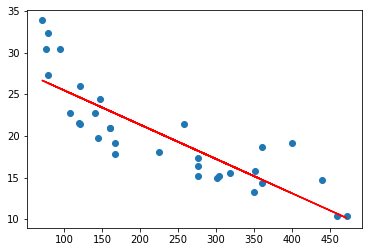

In [12]:
# Visualizando os graficos
plt.scatter(X, y)
plt.plot(X, previsoes, color='r')
plt.show()

In [35]:
# fazendo agora a regressão multipla

X1 = base.iloc[:, 1:4].values
y1 = base.iloc[:, 0].values
modelo2 = LinearRegression()
modelo2.fit(X1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
# coeficiente de determinacao
print(modelo2.score(X1, y1))

0.7678877440928638


In [39]:
# coeficiente de determinacao ajustado
modelo_ajustado2 = sm.ols(formula = 'mpg ~ cyl + disp + hp', data = base)
modelo_treinado2 = modelo_ajustado2.fit()
modelo_treinado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     30.88
Date:                Tue, 17 Mar 2020   Prob (F-statistic):           5.05e-09
Time:                        08:55:31   Log-Likelihood:                -79.009
No. Observations:                  32   AIC:                             166.0
Df Residuals:                      28   BIC:                             171.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.1849      2.591     13.195      0.000      28.878      39.492
cyl           -1.2274      0.797     -1.540      0.135      -2.861       0.406
disp          -0.0188      0.010     -1.811      0.081      -0.040       0.002
hp            -0.0147      0.015     -1.002      0.325      -0.045       0.015
==============================================================================
Omnibus:                        2.942   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                2.558
Skew:                           0.675   Prob(JB):                        0.278
Kurtosis:                       2.692   Cond. No.                     1.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
# fazendo uma previsao
novo = np.array([4, 200, 100])
# muda o formato
novo = novo.reshape(1,-1)
modelo2.predict(novo)

[[  4 200 100]]


array([24.03968887])